In [1]:
import pandas as pd
import numpy as np

In [35]:
#Ingestion of data
df=pd.read_csv(r'C:\Users\hkmis\Downloads\HR_comma_sep.csv')

In [ ]:
#EDA(Exploratary Data Analysis)

In [83]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [37]:
df.shape

(14999, 10)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [39]:
df1=df.groupby('time_spend_company').agg({'average_montly_hours':['mean','min','max']})

In [40]:
df1

average_montly_hours          
                                   mean  min  max
time_spend_company                               
2                            200.133169   96  296
3                            186.632935   96  310
4                            223.455221   96  310
5                            222.978955   98  310
6                            212.051532   97  293
7                            200.744681  102  286
8                            193.802469  100  279
10                           199.224299  108  284

In [41]:
grp=df.groupby(['Department','salary'])

In [42]:
grp1=grp.get_group(('sales','medium'))

In [43]:
grp1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
99,0.90,1.00,5,221,6,0,1,0,sales,medium
100,0.38,0.52,2,154,3,0,1,0,sales,medium
101,0.36,0.52,2,147,3,0,1,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
14945,0.14,0.75,4,277,5,1,1,0,sales,medium
14968,0.40,0.47,2,128,3,0,1,0,sales,medium
14969,0.43,0.46,2,157,3,0,1,0,sales,medium
14970,0.78,0.93,4,225,5,0,1,0,sales,medium


In [44]:
grp1['left'].value_counts()

0    1469
1     303
Name: left, dtype: int64

In [47]:
df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [48]:
df.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [49]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

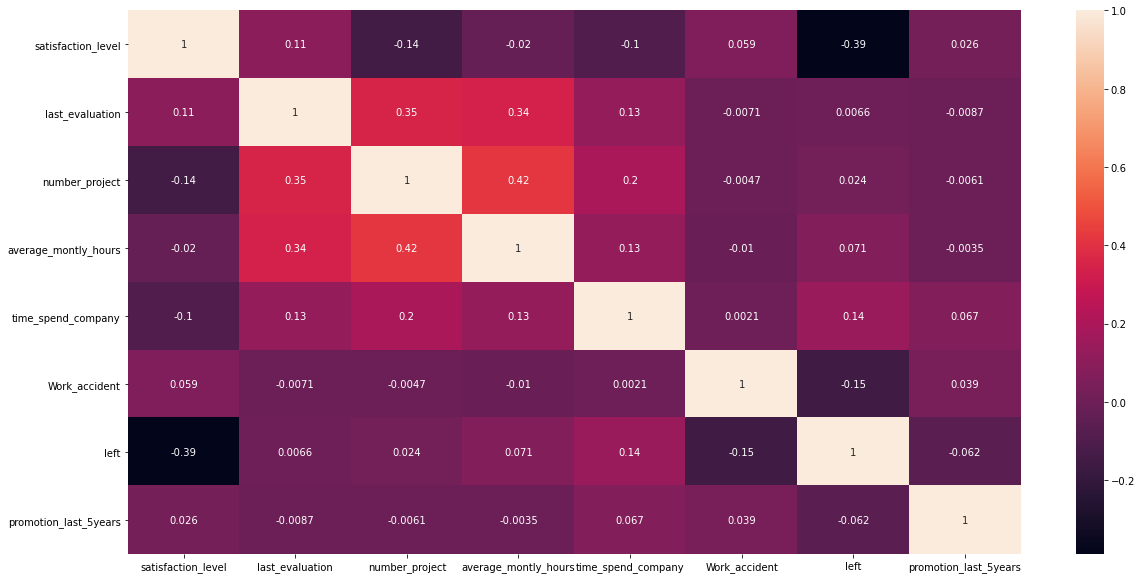

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

C:\Users\hkmis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

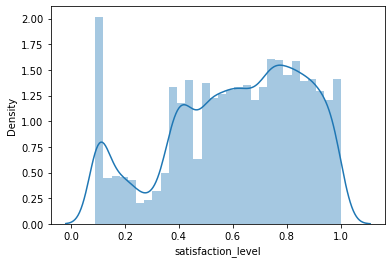

In [52]:
sns.distplot(df['satisfaction_level'])

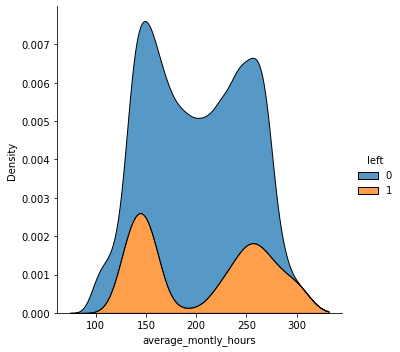

In [53]:
sns.displot(df,x='average_montly_hours',hue='left',kind='kde',multiple='stack')

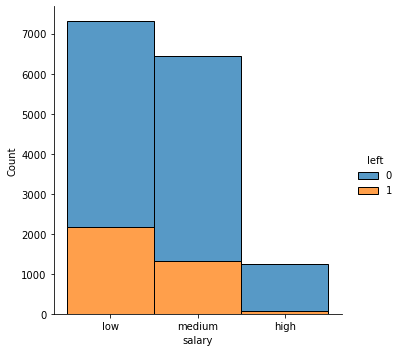

In [54]:
sns.displot(df,x='salary',hue='left',multiple='stack')

In [ ]:
#Data pre-processing

In [55]:
X=df.drop('left',axis=1)

In [56]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [28]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [57]:
X=pd.get_dummies(X,columns=['salary'],drop_first=True)

In [58]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,sales,1,0
1,0.80,0.86,5,262,6,0,0,sales,0,1
2,0.11,0.88,7,272,4,0,0,sales,0,1
3,0.72,0.87,5,223,5,0,0,sales,1,0
4,0.37,0.52,2,159,3,0,0,sales,1,0


In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for Department in X.columns:
    if X[Department].dtype == type(object):
        X[Department] = le.fit_transform(X[Department])

In [60]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,7,1,0
1,0.80,0.86,5,262,6,0,0,7,0,1
2,0.11,0.88,7,272,4,0,0,7,0,1
3,0.72,0.87,5,223,5,0,0,7,1,0
4,0.37,0.52,2,159,3,0,0,7,1,0


In [61]:
X.shape

(14999, 10)

In [64]:
Y=df['left']

In [ ]:
#Model Building

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [67]:
X_test.shape

(4500, 10)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()

In [70]:
model.fit(X_train,y_train)

C:\Users\hkmis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [72]:
model.score(X_test,y_test)

0.7984444444444444

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
clf=DecisionTreeClassifier()

In [75]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
pred=clf.predict(X_test)

In [81]:
acc=clf.score(X_test,y_test)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3448
           1       0.95      0.97      0.96      1052

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [80]:
print(confusion_matrix(y_test,pred))

[[3394   54]
 [  33 1019]]


In [82]:
print("Accuracy with decision tree model is",acc,"with good F1 score")

Accuracy with decision tree model is 0.9806666666666667 with good F1 score
